In [3]:
import ROOT

### Checkpoints
1. Is NPV distribution different between paths (in data and MC)? -> different in muon paths (data)
2. Is NPV distribution different between samples? -> compare DYJets & WJets_MG -> different in electron paths (MC)
3. Is NPV distribution different between IDs? -> No difference, use loose ID as default

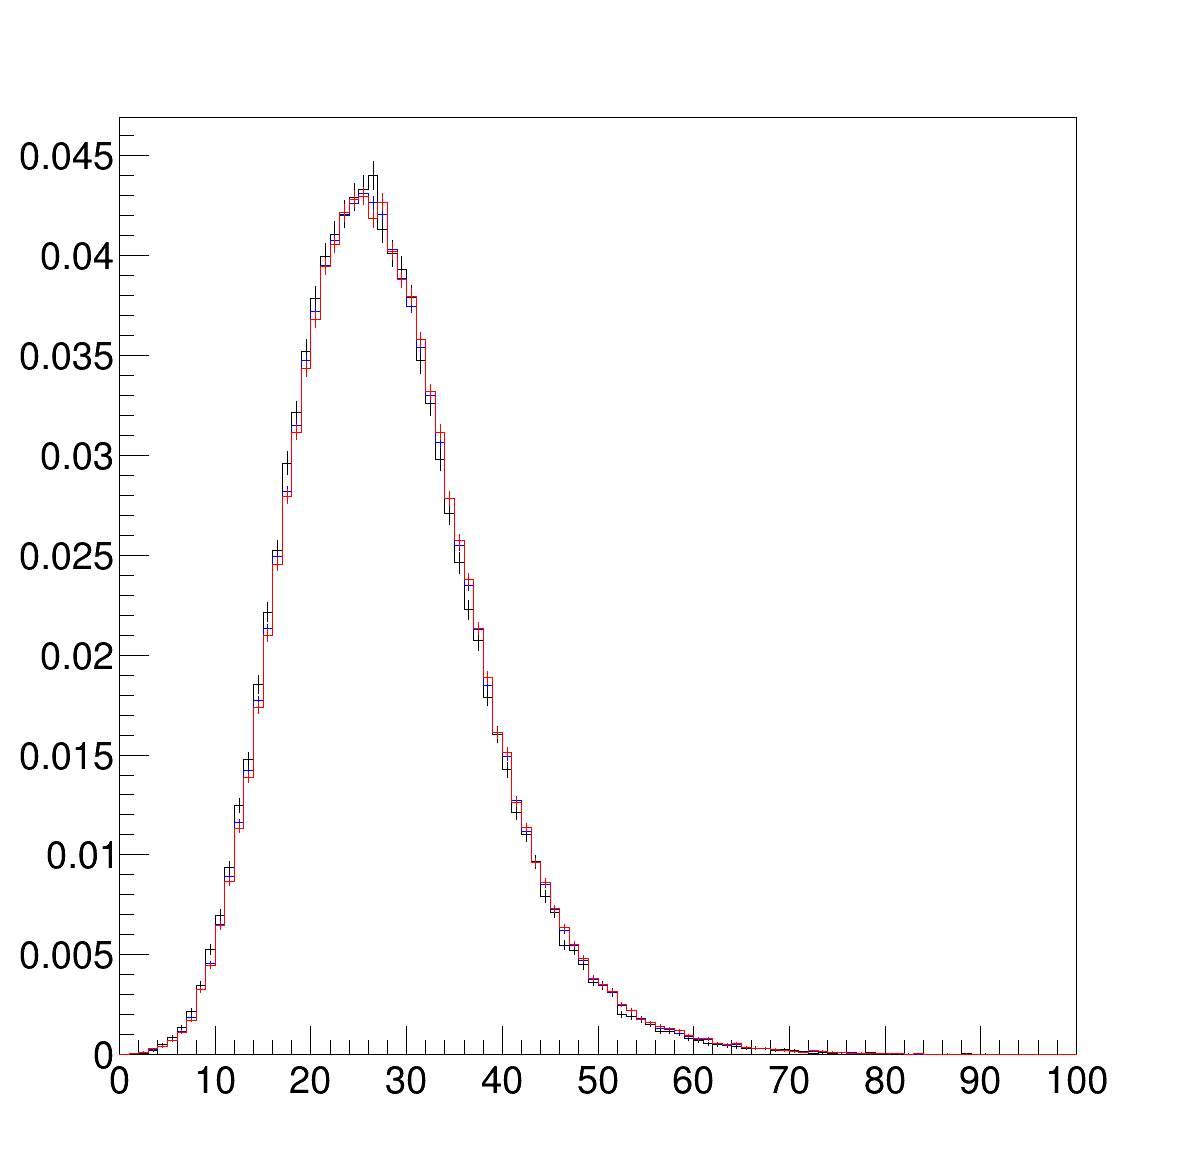

In [4]:
# compare difference between paths in data / electron
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis"
ERA = "2018"
FLAG = "MeasFakeEl"
ID = "loose"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/DATA/MeasFakeRateV2_EGamma.root")
h_el8 = f_data.Get(f"Inclusive_Ele8/{ID}/Central/nPV"); h_el8.SetDirectory(0)
h_el12 = f_data.Get(f"Inclusive_Ele12/{ID}/Central/nPV"); h_el12.SetDirectory(0)
h_el23 = f_data.Get(f"Inclusive_Ele23/{ID}/Central/nPV"); h_el23.SetDirectory(0)
f_data.Close()

h_el8.SetStats(0)
h_el8.Scale(1./h_el8.Integral());       h_el8.SetLineColor(ROOT.kBlack)
h_el12.Scale(1./h_el12.Integral());     h_el12.SetLineColor(ROOT.kBlue)
h_el23.Scale(1./h_el23.Integral());     h_el23.SetLineColor(ROOT.kRed)

c = ROOT.TCanvas("c", "", 1200, 1200)
c.cd()
h_el8.Draw("hist&e")
h_el12.Draw("hist&e&same")
h_el23.Draw("hist&e&same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


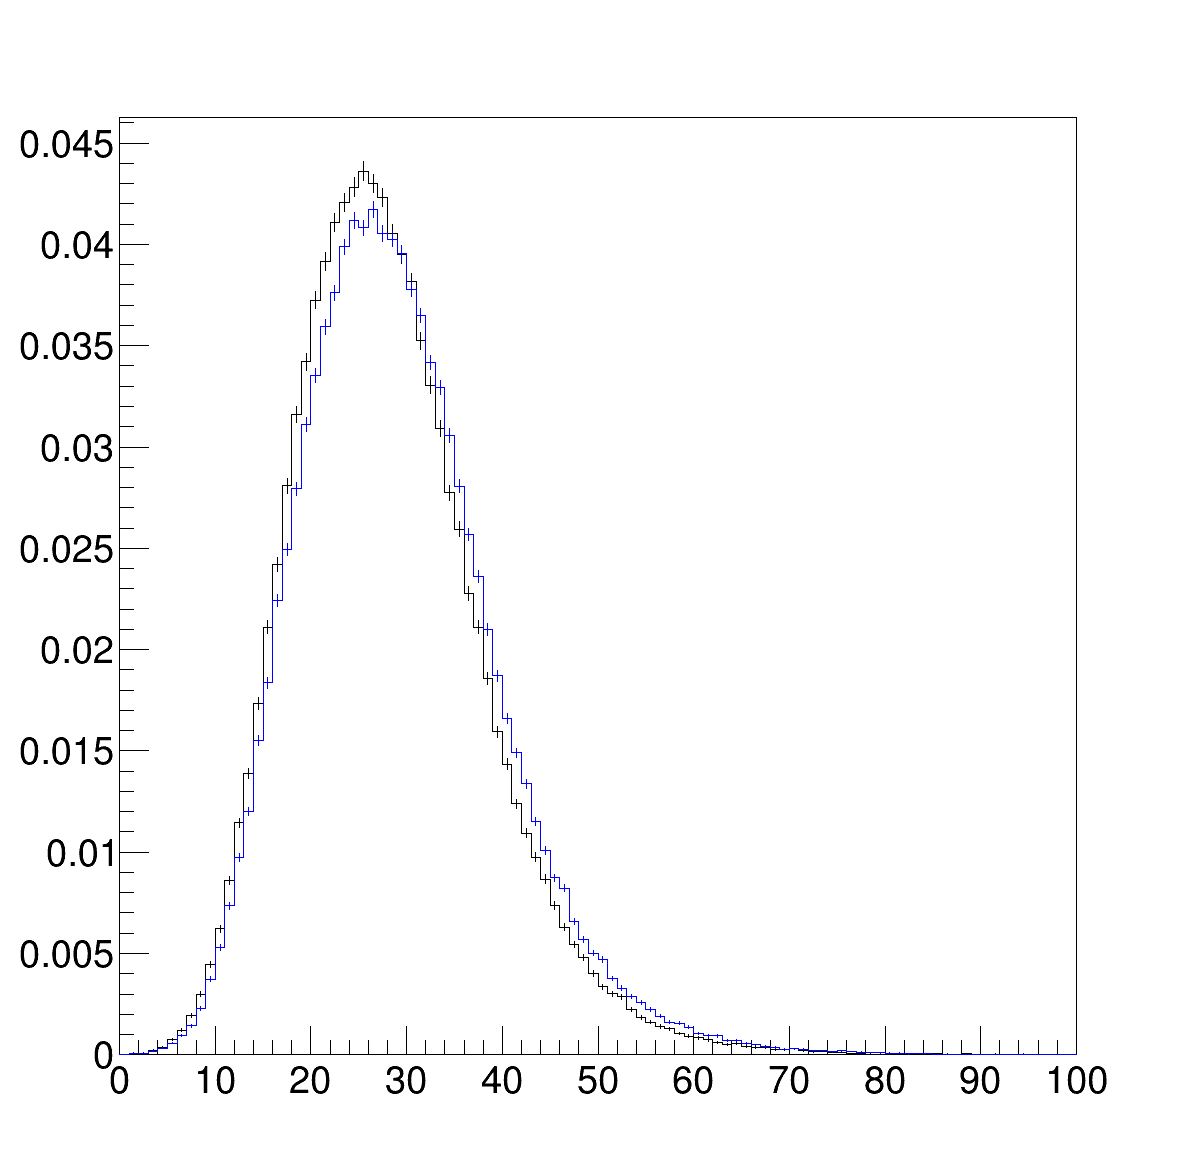

In [5]:
# compare difference between paths in data / muon
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis"
ERA = "2018"
FLAG = "MeasFakeMu"
ID = "loose"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/DATA/MeasFakeRateV2_DoubleMuon.root")
h_mu8 = f_data.Get(f"Inclusive_Mu8/{ID}/Central/nPV"); h_mu8.SetDirectory(0)
h_mu17 = f_data.Get(f"Inclusive_Mu17/{ID}/Central/nPV"); h_mu17.SetDirectory(0)
f_data.Close()

h_mu8.SetStats(0)
h_mu8.Scale(1./h_mu8.Integral());       h_mu8.SetLineColor(ROOT.kBlack)
h_mu17.Scale(1./h_mu17.Integral());     h_mu17.SetLineColor(ROOT.kBlue)

c = ROOT.TCanvas("c", "", 1200, 1200)
c.cd()
h_mu8.Draw("hist&e")
h_mu17.Draw("hist&e&same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


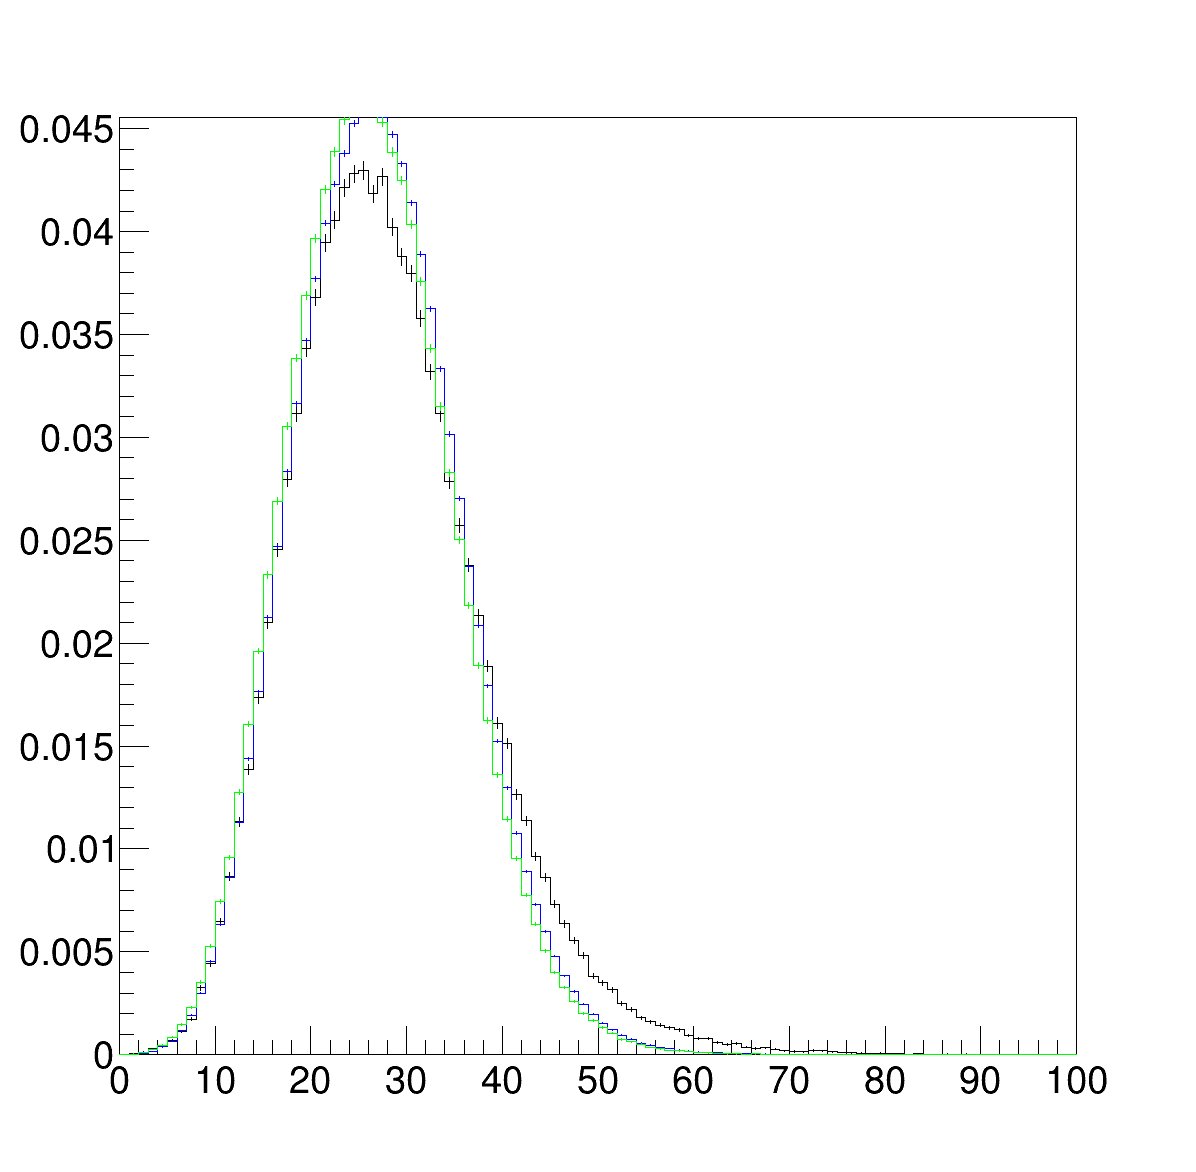

In [6]:
# compare difference between DY / W samples (electron)
ERA = "2018"
FLAG = "MeasFakeEl"
PATH = "Ele23"
ID = "loose"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/DATA/MeasFakeRateV2_EGamma.root")
f_DY = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/MeasFakeRateV2_DYJets.root")
f_W = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/MeasFakeRateV2_WJets_MG.root")

h_data = f_data.Get(f"Inclusive_{PATH}/{ID}/Central/nPV"); h_data.SetDirectory(0)
h_DY = f_DY.Get(f"Inclusive_{PATH}/{ID}/Central/nPV");     h_DY.SetDirectory(0)
h_W = f_W.Get(f"Inclusive_{PATH}/{ID}/Central/nPV");       h_W.SetDirectory(0)

h_data.SetStats(0); h_data.GetYaxis().SetRangeUser(0., 0.1)
h_data.Scale(1./h_data.Integral());     h_data.SetLineColor(ROOT.kBlack)
h_DY.Scale(1./h_DY.Integral());         h_DY.SetLineColor(ROOT.kBlue)
h_W.Scale(1./h_W.Integral());           h_W.SetLineColor(ROOT.kGreen)

c = ROOT.TCanvas("c", "", 1200, 1200)
h_data.Draw("hist&e")
h_DY.Draw("hist&e&same")
h_W.Draw("hist&e&same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


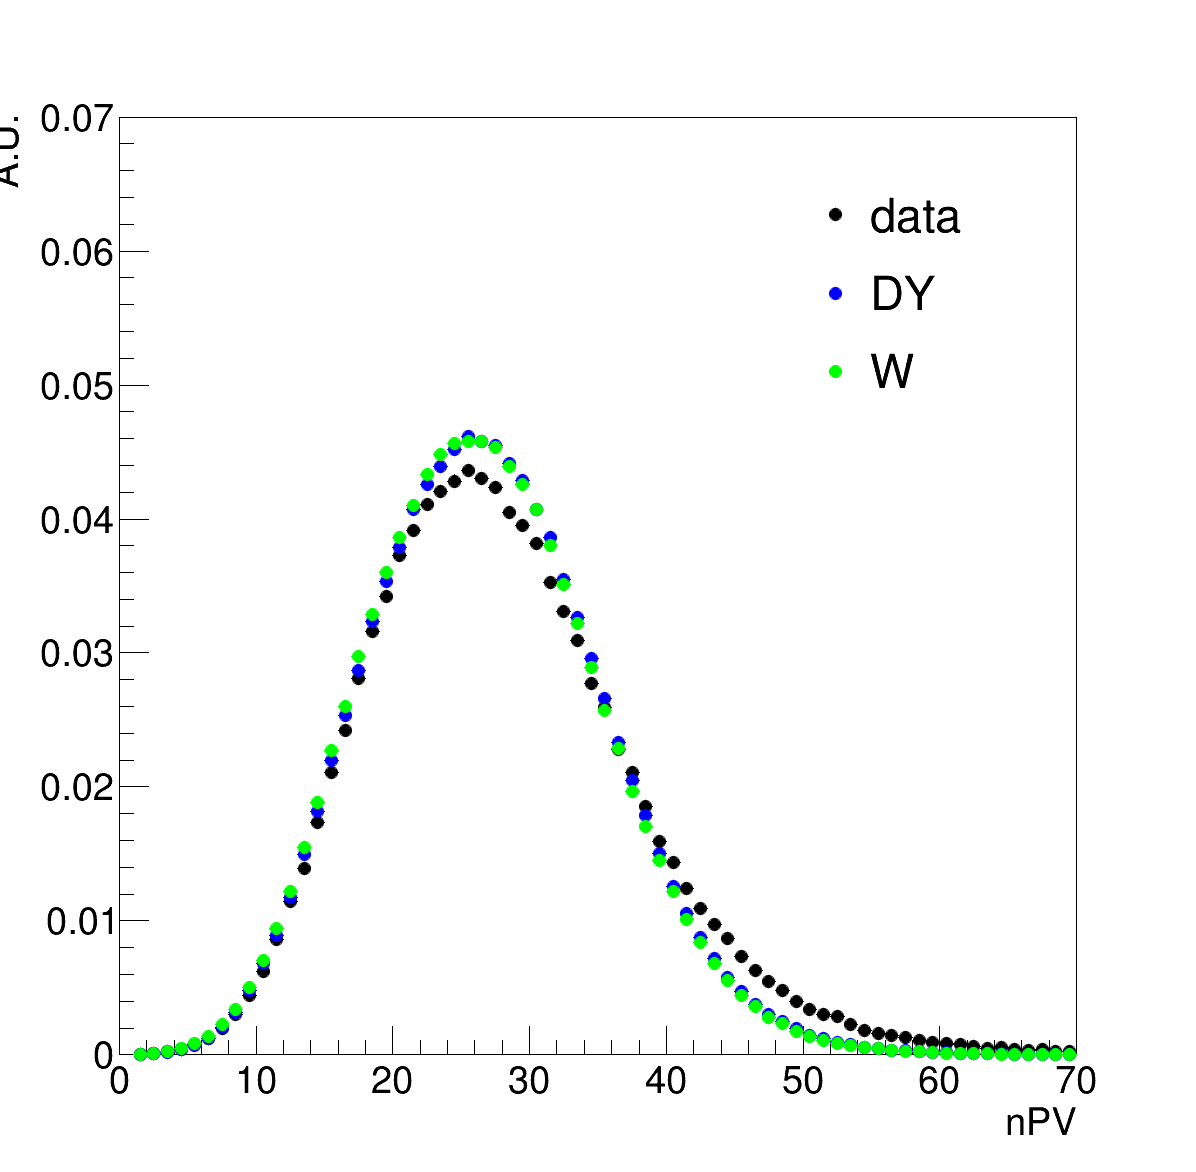

In [21]:
# compare difference between DY / W samples (muon)
ERA = "2018"
FLAG = "MeasFakeMu"
PATH = "Mu8"
ID = "loose"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/DATA/MeasFakeRateV2_DoubleMuon.root")
f_DY = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/MeasFakeRateV2_DYJets.root")
f_W = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/MeasFakeRateV2_WJets_MG.root")

h_data = f_data.Get(f"Inclusive_{PATH}/{ID}/Central/nPV"); h_data.SetDirectory(0)
h_DY = f_DY.Get(f"Inclusive_{PATH}/{ID}/Central/nPV");     h_DY.SetDirectory(0)
h_W = f_W.Get(f"Inclusive_{PATH}/{ID}/Central/nPV");       h_W.SetDirectory(0)

h_data.SetStats(0)
h_data.SetMarkerStyle(8)
h_data.SetMarkerSize(1.5)
h_data.SetMarkerColor(ROOT.kBlack)
h_DY.SetMarkerStyle(8)
h_DY.SetMarkerSize(1.5)
h_DY.SetMarkerColor(ROOT.kBlue)
h_W.SetMarkerStyle(8)
h_W.SetMarkerSize(1.5)
h_W.SetMarkerColor(ROOT.kGreen)
h_data.Scale(1./h_data.Integral());     h_data.SetLineColor(ROOT.kBlack)
h_DY.Scale(1./h_DY.Integral());         h_DY.SetLineColor(ROOT.kBlue)
h_W.Scale(1./h_W.Integral());           h_W.SetLineColor(ROOT.kGreen)

l = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
l.SetFillStyle(0)
l.SetBorderSize(0)
l.AddEntry(h_data, "data", "p")
l.AddEntry(h_DY, "DY", "p")
l.AddEntry(h_W, "W", "p")

c = ROOT.TCanvas("c", "", 1200, 1200)
h_data.GetXaxis().SetRangeUser(0., 70.)
h_data.GetXaxis().SetTitle("nPV")
h_data.GetYaxis().SetTitle("A.U.")
h_data.GetYaxis().SetRangeUser(0., 0.07)
h_data.Draw("p")
h_DY.Draw("p&same")
h_W.Draw("p&same")
l.Draw("same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


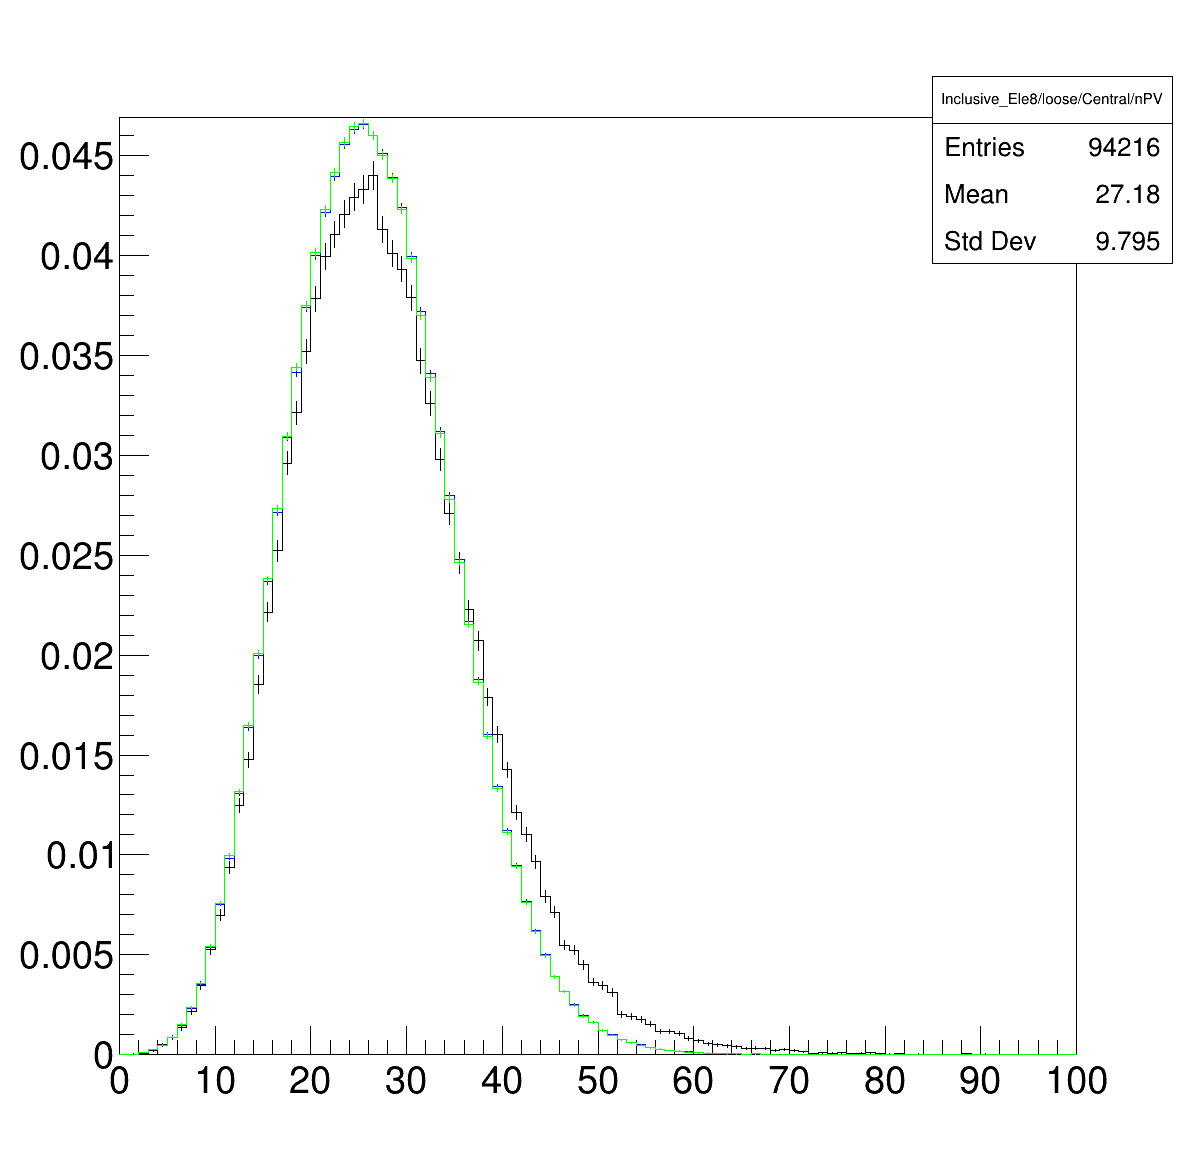

In [16]:
# comparison between IDs (electron)
ERA = "2018"
FLAG = "MeasFakeEl"
PATH = "Ele8"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/DATA/MeasFakeRateV2_EGamma.root")
f_W = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRateV2/{ERA}/{FLAG}__/MeasFakeRateV2_WJets_MG.root")

h_data = f_data.Get(f"Inclusive_{PATH}/loose/Central/nPV"); h_data.SetDirectory(0)
h_loose = f_W.Get(f"Inclusive_{PATH}/loose/Central/nPV");  h_loose.SetDirectory(0)
h_tight = f_W.Get(f"Inclusive_{PATH}/tight/Central/nPV");  h_tight.SetDirectory(0)

h_data.Scale(1./h_data.Integral())
h_loose.Scale(1./h_loose.Integral())
h_tight.Scale(1./h_tight.Integral())

h_data.SetLineColor(ROOT.kBlack)
h_loose.SetLineColor(ROOT.kBlue)
h_tight.SetLineColor(ROOT.kGreen)

c = ROOT.TCanvas("c", "", 1200, 1200)
h_data.Draw("hist&e")
h_loose.Draw("hist&e&same")
h_tight.Draw("hist&e&same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


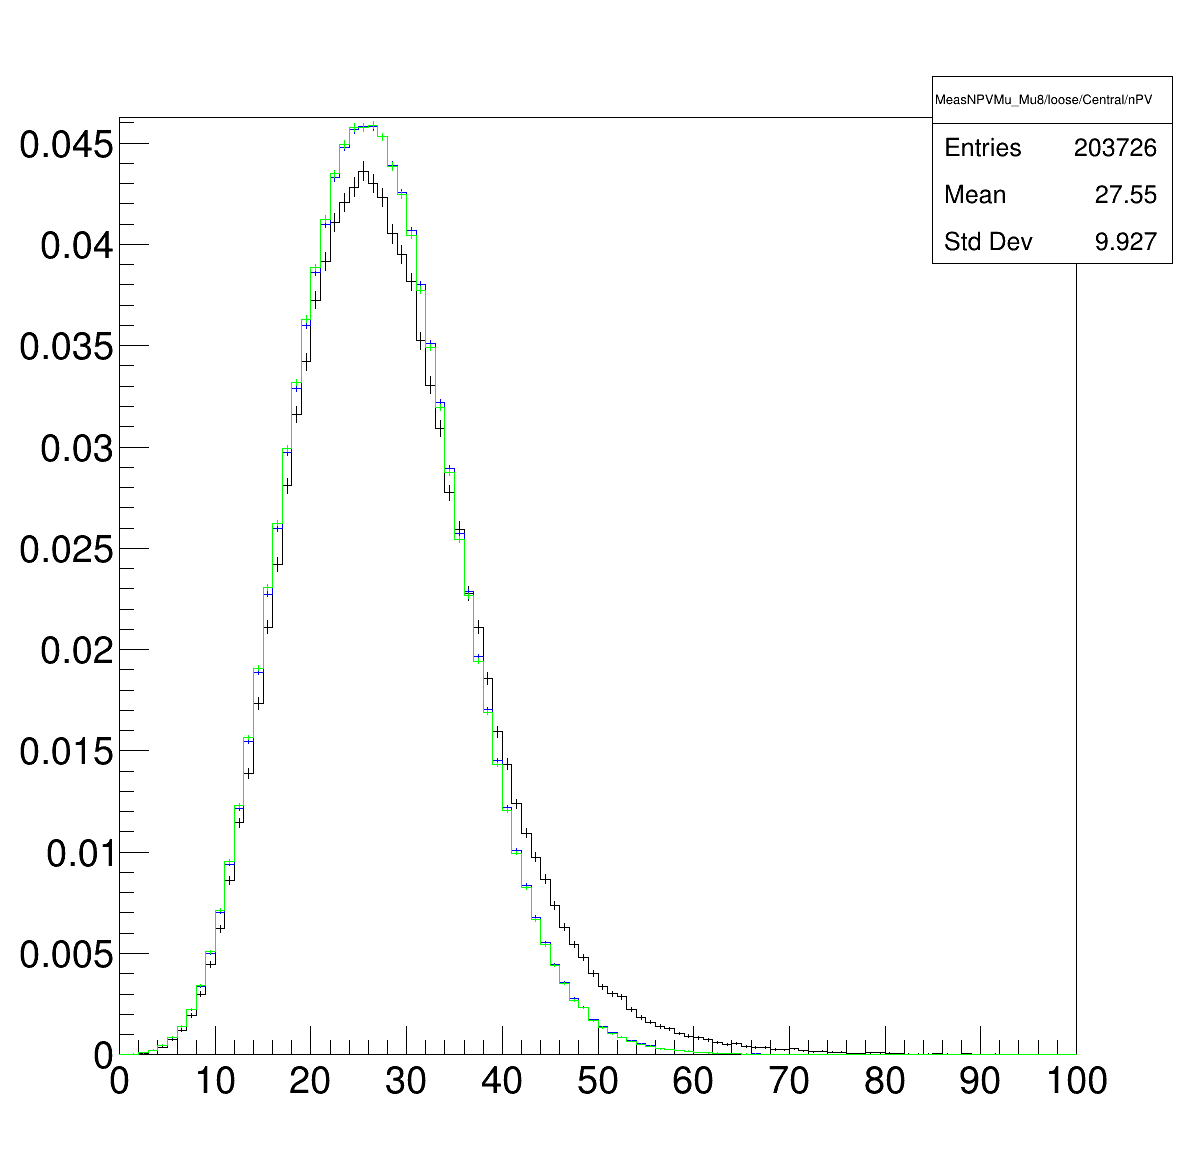

In [7]:
# comparison between IDs (muon)
ERA = "2018"
FLAG = "MeasNPVMu"
PATH = "Mu8"

f_data = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRate/{ERA}/{FLAG}__/DATA/MeasFakeRate_DoubleMuon.root")
f_W = ROOT.TFile.Open(f"{WORKDIR}/data/MeasFakeRate/{ERA}/{FLAG}__/MeasFakeRate_WJets_MG.root")

h_data = f_data.Get(f"{FLAG}_{PATH}/loose/Central/nPV"); h_data.SetDirectory(0)
h_loose = f_W.Get(f"{FLAG}_{PATH}/loose/Central/nPV");  h_loose.SetDirectory(0)
h_tight = f_W.Get(f"{FLAG}_{PATH}/tight/Central/nPV");  h_tight.SetDirectory(0)

h_data.Scale(1./h_data.Integral())
h_loose.Scale(1./h_loose.Integral())
h_tight.Scale(1./h_tight.Integral())

h_data.SetLineColor(ROOT.kBlack)
h_loose.SetLineColor(ROOT.kBlue)
h_tight.SetLineColor(ROOT.kGreen)

c = ROOT.TCanvas("c", "", 1200, 1200)
h_data.Draw("hist&e")
h_loose.Draw("hist&e&same")
h_tight.Draw("hist&e&same")
c.Draw()